In [1]:
import cv2
import os

def video_to_images(video_path, output_folder, num_images=200):
    """
    Extracts 'num_images' from a video, detects faces in each frame, and saves cropped faces as images.
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load pre-trained Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    interval = max(1, total_frames // num_images)  # Calculate interval to extract frames evenly

    count = 0
    image_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Process every 'interval' frame
        if count % interval == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50))

            # Save cropped face
            for (x, y, w, h) in faces:
                face = frame[y:y+h, x:x+w]
                face_resized = cv2.resize(face, (128, 256))  # Resize to match model input size
                image_path = os.path.join(output_folder, f"face_{image_count + 1}.jpg")
                cv2.imwrite(image_path, face_resized)
                image_count += 1
                break  # Save one face per frame

        count += 1
        if image_count >= num_images:
            break

    cap.release()

def process_videos(videos_folder, output_folder, num_images=200):
    """
    Processes all videos in a folder, extracting and saving faces as images.
    """
    video_files = [f for f in os.listdir(videos_folder) if f.endswith(('.mp4', '.avi', '.mov'))]

    for video_file in video_files:
        video_path = os.path.join(videos_folder, video_file)
        video_output_folder = os.path.join(output_folder, os.path.splitext(video_file)[0])
        print(f"Processing {video_file}...")
        video_to_images(video_path, video_output_folder, num_images)
        print(f"Finished processing {video_file}. Images saved to {video_output_folder}")

if __name__ == "__main__":
    videos_folder = "Downloads/new/video"  # Input video folder
    output_folder = "Downloads/new/output"  # Folder to save extracted images
    process_videos(videos_folder, output_folder)


Processing Aavani P Vas.mp4...
Finished processing Aavani P Vas.mp4. Images saved to Downloads/new/output\Aavani P Vas
Processing Bharath Dev G S.mp4...
Finished processing Bharath Dev G S.mp4. Images saved to Downloads/new/output\Bharath Dev G S
Processing Hafsana.mp4...
Finished processing Hafsana.mp4. Images saved to Downloads/new/output\Hafsana


In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
from keras.preprocessing.image import load_img
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 32
image_size = (128, 256)  # Input size of the model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of images for validation
)

train_generator = train_datagen.flow_from_directory(
    'Downloads/new/Train',  # Path to preprocessed face images
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'Downloads/new/Test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 922 images belonging to 3 classes.
Found 228 images belonging to 3 classes.


In [13]:
from keras import models, layers

model1 = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),

    # Dense layers
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Dynamic number of classes
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

# Train the model
model1.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

# Save the trained model
model1.save('face_recognition_model5.h5')


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 127, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 125, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 123, 64)         │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 13, 256)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16640)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,260,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,686,211 (17.88 MB)

 Trainable params: 4,686,211 (17.88 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.4723 - loss: 0.9542 - val_accuracy: 0.9062 - val_loss: 0.2597
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9688 - loss: 0.1112 - val_accuracy: 0.7500 - val_loss: 1.3073
Epoch 3/10


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9590 - loss: 0.1526 - val_accuracy: 0.9286 - val_loss: 0.2778
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.0644 - val_accuracy: 1.0000 - val_loss: 0.0518
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9818 - loss: 0.0545 - val_accuracy: 0.9732 - val_loss: 0.1360
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 7.7716e-05 - val_accuracy: 1.0000 - val_loss: 1.4401e-04
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9932 - loss: 0.0183 - val_accuracy: 0.9911 - val_loss: 0.0461
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 2.3643e-04
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 1.0000 - loss: 9.4280e-04 - val_accuracy: 0.9866 - val_loss: 0.1167
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 6.8116e-04 - val_accuracy: 1.0000 -

In [15]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9517 - loss: 0.2690 - val_accuracy: 0.9598 - val_loss: 0.2115
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 6.3613e-05 - val_accuracy: 1.0000 - val_loss: 0.0384
Epoch 3/20


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9866 - loss: 0.0284 - val_accuracy: 0.9688 - val_loss: 0.1478
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.2497e-05 - val_accuracy: 1.0000 - val_loss: 8.3446e-07
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9975 - loss: 0.0045 - val_accuracy: 0.9866 - val_loss: 0.1023
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 1.3976e-05 - val_accuracy: 1.0000 - val_loss: 5.0664e-07
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9980 - loss: 0.0020 - val_accuracy: 0.9866 - val_loss: 0.0846
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.1548e-07 - val_accuracy: 1.0000 - val_loss: 2.5658e-05
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 1.0000 - loss: 4.3935e-05 - val_accuracy: 0.9866 - val_loss: 0.0870
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 5.9977e-07 - val_accura

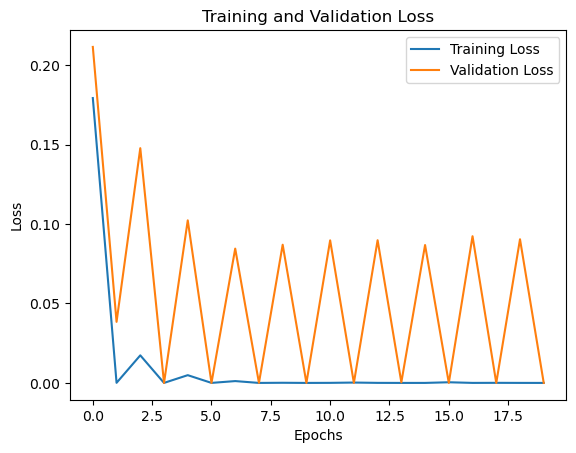

In [17]:
import matplotlib.pyplot as plt
# Train the model
history = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
num_classes = 3  # Replace 10 with the actual number of classes in your dataset
from keras import models
from keras import layers

model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),
    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 4 output classes
])

# Print the summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)                   │ (None, 126, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 127, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 61, 125, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 28, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 53760)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       6,881,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,975,043 (26.61 MB)

 Trainable params: 6,975,043 (26.61 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5065 - loss: 1.7216 - val_accuracy: 0.9167 - val_loss: 0.1662
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0713 - val_accuracy: 0.8889 - val_loss: 0.1915
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9962 - loss: 0.0266 - val_accuracy: 1.0000 - val_loss: 4.3524e-05
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 2.9678e-04 - val_accuracy: 1.0000 - val_loss: 0.0419
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 990ms/step - accuracy: 0.9822 - loss: 0.0497 - val_accuracy: 1.0000 - val_loss: 3.0692e-04
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 4.3408e-04 - val_accuracy: 1.0000 - val_loss: 2.2279e-04
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 3.2784e-05 - val_accuracy: 1.0000 - val_loss: 5.1147e-06
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 9.4355e

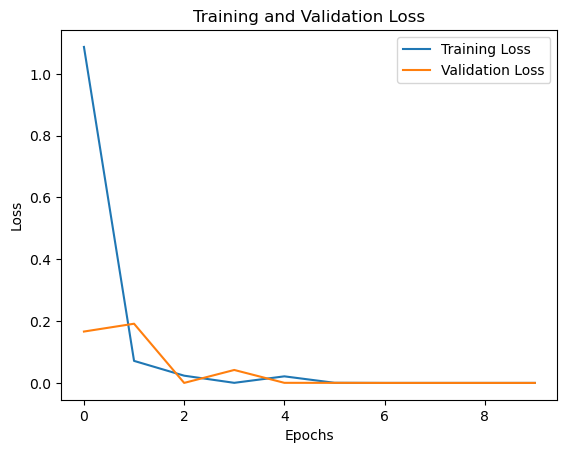

In [46]:
import matplotlib.pyplot as plt
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
num_classes = 3  # Replace 10 with the actual number of classes in your dataset
from keras import models
from keras import layers

model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten layer to transition from convolution to dense layers
    layers.Flatten(),
    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 4 output classes
])

# Print the summary of the model
model.summary()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 126, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 63, 127, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 61, 125, 64)         │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 30, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 28, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 14, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 12, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 6, 14, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 10752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       1,376,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,636,931 (6.24 MB)

 Trainable params: 1,636,931 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4277 - loss: 1.1216 - val_accuracy: 0.9062 - val_loss: 0.3999
Epoch 2/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9375 - loss: 0.3954

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9375 - loss: 0.3954 - val_accuracy: 0.8889 - val_loss: 0.2276
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9630 - loss: 0.1334 - val_accuracy: 0.9375 - val_loss: 0.0861
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9375 - loss: 0.2169 - val_accuracy: 0.7778 - val_loss: 0.1839
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9862 - loss: 0.0384 - val_accuracy: 0.9062 - val_loss: 0.3616
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.8889 - val_loss: 0.8799
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9583 - val_loss: 0.1172
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 1.0020e-04 - val_accuracy: 1.0000 - val_loss: 7.0201e-07
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 2.2053e-04 - val_accuracy: 0.9792 - val_

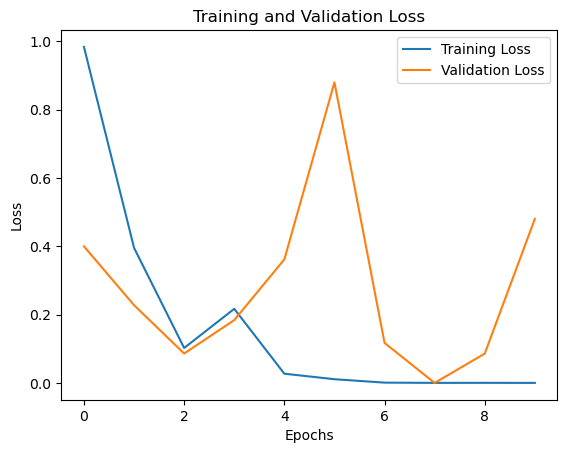

In [107]:
import matplotlib.pyplot as plt
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [126]:
from keras.applications import DenseNet169
from keras import layers, models

# Number of output classes
num_classes = 3

# Load DenseNet-169 with pre-trained ImageNet weights (can replace with 'None' if you want to train from scratch)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(128, 256, 3))

# Freeze the base model layers (if you're fine-tuning the top layers)
base_model.trainable = False  # Set to True if you want to fine-tune the model

# Add custom top layers
modeldens = models.Sequential([
    base_model,  # Include DenseNet-169 base
    layers.GlobalAveragePooling2D(),  # Pooling the feature map
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Print the summary of the model
modeldens.summary()


51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)             │ (None, 4, 8, 1664)          │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1664)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         213,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,856,387 (49.04 MB)

 Trainable params: 213,507 (834.01 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [127]:
modeldens.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.8288 - loss: 0.5276 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 2/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 1.0000 - loss: 5.7454e-04

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 1.0000 - loss: 5.7454e-04 - val_accuracy: 1.0000 - val_loss: 6.2223e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 1.0000 - loss: 3.5184e-04 - val_accuracy: 1.0000 - val_loss: 2.4958e-04
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 1.0000 - loss: 5.1704e-04 - val_accuracy: 1.0000 - val_loss: 1.5119e-04
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000 - loss: 1.9863e-04 - val_accuracy: 1.0000 - val_loss: 1.5563e-04
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 1.0000 - loss: 1.5148e-04 - val_accuracy: 1.0000 - val_loss: 9.8699e-05
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000 - loss: 1.2448e-04 - val_accuracy: 1.0000 - val_loss: 1.2791e-04
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 1.0000 - loss: 8.4278e-05 - val_accuracy: 1.0000 - val_loss: 8.4612e-05
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 1.0000

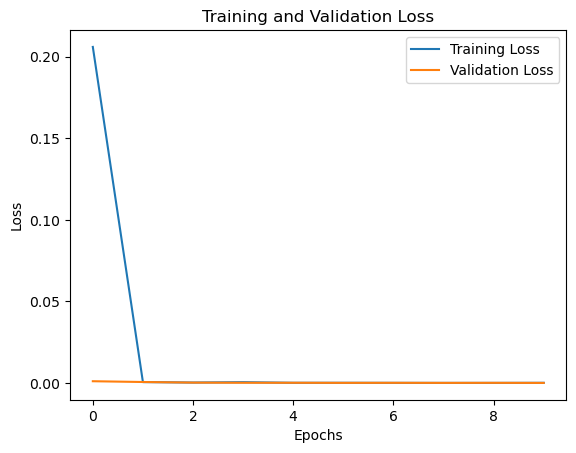

In [128]:
import matplotlib.pyplot as plt
# Train the model
history = modeldens.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [129]:
modeldens.save('Downloads/new/Model/modeldens.h5')

In [130]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Downloads/new/Test',  # Change this to the directory containing your test data
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for evaluation
)

Found 75 images belonging to 3 classes.


In [133]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load model
model = load_model('Downloads/new/Model/modeldens.h5')

# Assuming you have a fixed number of samples in your test dataset
num_test_samples = len(test_generator.filenames)

# Ensure batch_size is defined earlier
batch_size = test_generator.batch_size

# Predict on test data
y_pred = model.predict(test_generator, steps=int(np.ceil(num_test_samples / batch_size)))

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Retrieve true labels from the test generator
y_true_labels = test_generator.classes

# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step
Accuracy: 0.9867
Precision: 0.9872
Recall: 0.9867
F1 Score: 0.9867


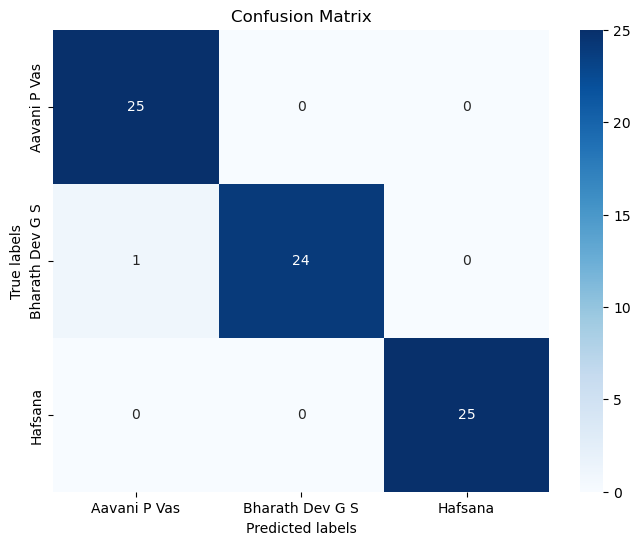

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [135]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import os

# Load the saved model
loaded_model = load_model('Downloads/new/Model/modeldens.h5')

# Define your test directory
test_dir = 'Downloads/new/Test'

# Class labels
class_labels = {0: 'Aavani P Vas', 1: 'Bharath Dev G S', 2: 'Hafsana' }

# Collect filenames and true labels
test_filenames = []
true_labels = []

for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):  # Assuming your images are pngs
            test_filenames.append(os.path.join(root, file))
            true_labels.append(os.path.basename(root))

# Make predictions and print true label, predicted label, and image path
predicted_labels = []
for filename, true_label in zip(test_filenames, true_labels):
    img = image.load_img(filename, target_size=(128, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_label = class_labels[predicted_class]

    predicted_labels.append(predicted_label)

    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print("Image Path:", filename)
    print("-------------------------")

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
true_labels_numeric = label_encoder.fit_transform(true_labels)
predicted_labels_numeric = label_encoder.transform(predicted_labels)

# Compute metrics
accuracy = accuracy_score(true_labels_numeric, predicted_labels_numeric)
precision = precision_score(true_labels_numeric, predicted_labels_numeric, average='weighted')
recall = recall_score(true_labels_numeric, predicted_labels_numeric, average='weighted')
f1 = f1_score(true_labels_numeric, predicted_labels_numeric, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Draw confusion matrix
conf_matrix = confusion_matrix(true_labels_numeric, predicted_labels_numeric)
print("Confusion Matrix:")
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
True Label: Aavani P Vas
Predicted Label: Aavani P Vas
Image Path: Downloads/new/Test\Aavani P Vas\image_176.jpg
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
True Label: Aavani P Vas
Predicted Label: Aavani P Vas
Image Path: Downloads/new/Test\Aavani P Vas\image_177.jpg
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
True Label: Aavani P Vas
Predicted Label: Aavani P Vas
Image Path: Downloads/new/Test\Aavani P Vas\image_178.jpg
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
True Label: Aavani P Vas
Predicted Label: Aavani P Vas
Image Path: Downloads/new/Test\Aavani P Vas\image_179.jpg
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
True Label: Aavani P Vas
Predicted Label: Aavani P Vas
Image Path: Downloads/new/Test\Aavani P Vas\image_180.jpg
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
True Label: Aavani P Vas
Predicted Label: Aavani P Vas
Image Path: Downloa